In [49]:
# La métrique euclidienne
def metric_euclid(x, y):
    sum=0
    for i in range(len(x)):
        sum += (x[i]-y[i])**2
    return math.sqrt(sum)

# La métrique #1 dans le fichier word
def metric_n1(x, y):
    sum_x=0
    sum_y=0
    for i in range(len(x)):
        sum_x += x[i]
        sum_y += y[i]
    return abs(sum_x - sum_y)

# La métrique #3 dans le fichier word
def metric_n3(x, y):
    sum=0
    for i in range(len(x)):
        if ((x[i]==0 and y[i]==0) or (x[i]!=0 and y[i]!=0)):
            sum+=1
    return 1 - sum/784

In [50]:
import csv
import random
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.neighbors import NearestNeighbors, kneighbors_graph,KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils.graph import graph_shortest_path
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import KernelPCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.manifold import MDS
from matplotlib.pyplot import scatter
#On ouvre le fichier 'mnist_train.csv'
data = open('mnist_train.csv')
csv_file = csv.reader(data)
data_points = []
for row in csv_file:
    data_points.append(row)
data.close()

#On enlève la première ligne, soit les "headers" de nos colonnes
data_points.pop(0)

#On transforme les données en integers
for i in range(len(data_points)):
    for j in range(0,785):
            data_points[i][j] = int(data_points[i][j])

#Vecteur 60 000 x 1 qui contient les étiquettes
y_train = []
for row in data_points:
    y_train.append(row[0])

#Matrice 60 000 x 784 qui contient les données
x_train = []
for row in data_points:
    x_train.append(row[1:785])
    
#On ouvre le fichier 'mnist_test.csv'
data = open('mnist_test.csv')
csv_file = csv.reader(data)
data_points = []
for row in csv_file:
    data_points.append(row)
data.close()

#On enlève la première ligne, soit les "headers" de nos colones
data_points.pop(0)

#Convertir en int
for i in range(len(data_points)):
    for j in range(0,785):
            data_points[i][j] = int(data_points[i][j])

#Vecteur 10 000 x 1 qui contient les étiquettes
y_test = []
for row in data_points:
    y_test.append(row[0])

#Matrice 10 000 x 784 qui contient les données
x_test = []
for row in data_points:
    x_test.append(row[1:785])

# PCoA

<function matplotlib.pyplot.show(*args, **kw)>

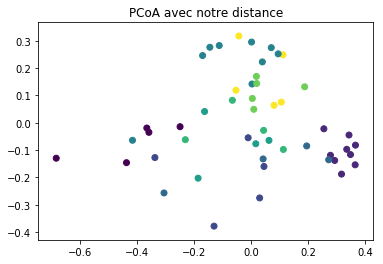

In [51]:
import numpy as np
x= x_test[0:200]
def PCoA(x, metric, n_components):
    m = pairwise_distances(x, metric=metric_n3)
#m = pairwise_distances(x__test, metric=metric_n1)
#m = pairwise_distances(x, metric=metric_euclid)

#S = 1. / (metric_n3 / np.max(metric_n3))
    KPCoa=KernelPCA(n_components=3, kernel='linear')
    X_transformedeu = KPCoa.fit_transform(m)
    return X_transformedeu
#print(X_transformedEuc)
y=y_test[0:50]
fig = plt.figure()  
ax1 = fig.add_subplot(111) 
ax1.set_title('PCoA avec notre distance')
ax1.scatter(X_transformedeu[:,0],X_transformedeu[:,1] , c=y, alpha=1)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

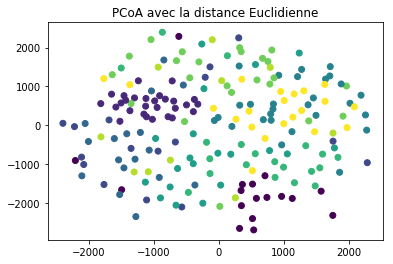

In [52]:
KPCoa=MDS(n_components=2)
X_transformede=KPCoa.fit_transform(x)

y=y_test[0:200]
fig = plt.figure()  
ax1 = fig.add_subplot(111) 
ax1.set_title('PCoA avec la distance Euclidienne')
ax1.scatter(X_transformede[:,0],X_transformede[:,1] , c=y, alpha=1)
plt.show

In [53]:
#préparer des donnéé
xtest = x_test[0:200]
y__test = y_test[0:200]
x__train = x_train[0:200]
y__train = y_train[0:200]

#compresser x__train avec la distance euclidienne
for n in range(50,300,50): 
    print(n)
    comp_mds = MDS(n_components=n)
    x__trainNew = comp_mds.fit_transform(x__train)
    knn = KNeighborsClassifier()
    knn.fit(x__trainNew,y__train)
    x__testNew = comp_mds.fit_transform(xtest)

   #évaluer le performance
    print("score de PCoA avec la distance Euclidienne:",knn.score(x__testNew,y__test))

#compresser x__train avec notre distance en utilisant PCoA
    x__MytrainNew = PCoA(x__train,metric_n3,2)
    x__MytestNew = PCoA(xtest,metric_n3,2)
    knn = KNeighborsClassifier()
    knn.fit(x__MytrainNew,y__train)

#évaluer le performance

    print("score de PCoA avec notre distance :",knn.score(x__MytestNew,y__test))

50
score de PCoA avec la distance Euclidienne: 0.095
score de PCoA avec notre distance : 0.305
100
score de PCoA avec la distance Euclidienne: 0.12
score de PCoA avec notre distance : 0.305
150
score de PCoA avec la distance Euclidienne: 0.055
score de PCoA avec notre distance : 0.305
200
score de PCoA avec la distance Euclidienne: 0.215
score de PCoA avec notre distance : 0.305
250
score de PCoA avec la distance Euclidienne: 0.07
score de PCoA avec notre distance : 0.305
